In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl

In [5]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size']=14

In [6]:
#grab data
filename = r'XRD_Rietveld.csv'
df = pd.read_csv(filename)

In [7]:
x_data = df['Q'].dropna()
y_obs = df['y_obs'].dropna()
y_fit = df['y_calc'].dropna()
y_bkg = df['y_bkg'].dropna()
hkl1 = df['phase 1'].dropna()
hkl2 = df['phase 2'].dropna()
#add as many additional phases as you need
#hkl3 = df['phase 3']
#hkl4 = df['phase 4']


In [8]:
#Set the limits of the plot
xmin=0.95
xmax=5.4

#Generate Ram's color palette
seshadri = ['#c3121e', '#0348a1', '#ffb01c', '#027608', '#0193b0', '#9c5300', '#949c01', '#7104b5']
#            0sangre,   1neptune,  2pumpkin,  3clover,   4denim,    5cocoa,    6cumin,    7berry

In [9]:
#Prepare multipanel plot 
fig = plt.figure(1, figsize=(5, 5))
#remember, gridspec is rows, then columns
gs = gridspec.GridSpec(15,1)
gs.update(wspace=0.25, hspace=0.45)

<Figure size 360x360 with 0 Axes>

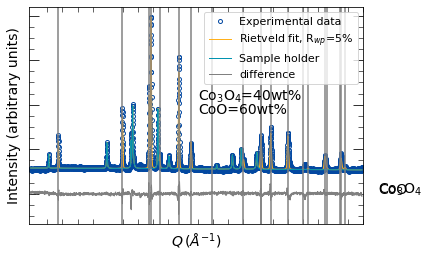

In [10]:
xtr_subsplot = fig.add_subplot(gs[2:15,0:1])
plt.plot(x_data, y_obs, label='Experimental data', linestyle='none', 
         marker='o', color=seshadri[1], mfc='none', markersize=4)
plt.plot(x_data, y_fit, label='Rietveld fit, R$_{wp}$=5%', 
         linestyle='-', color=seshadri[2], linewidth=1)
plt.plot(x_data, y_bkg, label='Sample holder', linestyle='-', 
         color=seshadri[4], linewidth=1)
plt.plot(x_data, y_fit-y_obs, label='difference', linestyle='-',
         color='grey', linewidth=1)
#Define ticks labels and legend
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False)    
xticks = np.arange(0, 5.5, 1)
yticks = np.arange(0,10000,2000)
plt.minorticks_on()
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('$Q\,(\AA^{-1})$') 
plt.ylabel('Intensity (arbitrary units)')  
plt.legend(fontsize=11)
plt.xlim(xmin,xmax)
#don't forget to label weight fractions of phases
plt.text(3.2,4200,'Co$_3$O$_4$=40wt%')
plt.text(3.2,3600,'CoO=60wt%')

#HKL position plot for phase 1
xtr_subsplot = fig.add_subplot(gs[0:1,0:1])
for xc in hkl1.values:
    plt.axvline(x=xc,color='grey')

plt.tick_params(direction='in',bottom=False, right=True, top=False)
plt.tick_params(labelleft=False, labelbottom=False)
plt.xlim(xmin,xmax)
plt.text(5.6,0.3,'Co$_3$O$_4$')

#HKL position plot for phase 2
xtr_subsplot = fig.add_subplot(gs[1:2,0:1])
for xc in hkl2.values:
    plt.axvline(x=xc,color='grey')

plt.tick_params(direction='in',bottom=False, right=True, top=False)
plt.tick_params(labelleft=False, labelbottom=False)
plt.xlim(xmin,xmax)
plt.text(5.6,0.3,'CoO')

#Export figure
#plt.savefig('example1.pdf')
plt.savefig('XRD_Reitveld.png', dpi=300,bbox_inches="tight")